# **OBJECTIVE:**

## ***To work with the CAR-MPG Data set, to asses the data and build clustering and predictive models for the better understanding of the business aspects of the various columns that are present in the dataset***

# **Acknowledgements**
**Dataset: UCI Machine Learning Repository**
**Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg**

In [ ]:
# Importing the necessary Modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split data into training and testing sets
##from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import sklearn # import the main sklearn module to access __version__



### ***printing the version of the various python libraries that has been used***

In [ ]:


print('pandas', pd.__version__)
print('numpy', np.__version__)
print('matplotlib',matplotlib.__version__)
print('seaborn',sns.__version__)
print('sklearn',sklearn.__version__)



pandas 2.2.2
numpy 1.26.4
matplotlib 3.8.0
seaborn 0.13.2
sklearn 1.5.2


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
car_data = pd.read_csv('cars-mpg.csv')
df_raw=car_data.copy()
car_data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car name  398 non-null    object 
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   mpg       398 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


### ***Here , we can see that, the HP column eventhough it has numeric values, we can see the data type as Object. so this needs to be changed***
### ***Also, we can see that the memory usage is around 25kb***

In [ ]:
df = car_data.copy()
df['cyl'] = pd.to_numeric(df['cyl'], downcast='unsigned')
df['wt'] = pd.to_numeric(df['wt'], downcast='unsigned')
df['yr'] = pd.to_numeric(df['yr'], downcast='unsigned')

df['disp'] = pd.to_numeric(df['disp'], downcast='float')
df['acc'] = pd.to_numeric(df['acc'], downcast='float')
df['mpg'] = pd.to_numeric(df['mpg'], downcast='float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car name  398 non-null    object 
 1   cyl       398 non-null    uint8  
 2   disp      398 non-null    float32
 3   hp        398 non-null    object 
 4   wt        398 non-null    uint16 
 5   acc       398 non-null    float32
 6   yr        398 non-null    uint8  
 7   mpg       398 non-null    float32
dtypes: float32(3), object(2), uint16(1), uint8(2)
memory usage: 12.6+ KB


### ***After Downcasting from Int 64 and float 64 to Int 32 and Float 32, we can see 50% reduction in the memory usage***

### ***Now to treat the HP column, as it is OBJECT and not a numeric column***

In [ ]:
temp_hp=pd.DataFrame(df.hp.str.isdigit()) # The 'isdigit' is a boolean function. Returns true if columns of a row contain
                                            # numeric value. Returns 'False' if it finds non-numeric values
                                            # temp_hp array will cotain 398 "True" or "False" enteries.
                                            # Those rows where any column has non-numeric, will have "False" in the array

temp_hp[temp_hp['hp'] == False] # Selecting all rows from the array which have "False"

,hp
32,False
126,False
330,False
336,False
354,False
374,False


### ***This shows 6 values have some non numeric value, so we need to treat those values***

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
#checking if the above code worked.
df[df.isnull().any(axis=1)]  #NaN is equal to null, hence we can use the isnull function to check whether the records with '?'
                                 # have been correctly imputed with NaN.

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.000000,71,25.000000
126,ford maverick,6,200.0,NaN,2875,17.000000,74,21.000000
330,renault lecar deluxe,4,85.0,NaN,1835,17.299999,80,40.900002
336,ford mustang cobra,4,140.0,NaN,2905,14.300000,80,23.600000
354,renault 18i,4,100.0,NaN,2320,15.800000,81,34.500000
374,amc concord dl,4,151.0,NaN,3035,20.500000,82,23.000000


### ***now we change the HP column from object to numeric data type***

In [ ]:
df['hp']=df['hp'].astype('float16') #change the data type ofhorsepower to numeric data type.

### ***we treat the missing values using the KNN imputer method***

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming 'df' is your DataFrame
# Select only numerical features for imputation
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]

# Create and apply the KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
data_imputed_knn = pd.DataFrame(imputer.fit_transform(df_numerical),
                                 columns=df_numerical.columns,
                                 index=df.index)  # Preserve original index

# Concatenate imputed numerical features with original non-numerical features
df = pd.concat([df.drop(columns=numerical_features), data_imputed_knn], axis=1)


### ***To verify if the Imputation has worked***

In [ ]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,buick skylark 320,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,plymouth satellite,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,amc rebel sst,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,ford torino,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car name  398 non-null    object 
 1   cyl       398 non-null    float32
 2   disp      398 non-null    float32
 3   hp        398 non-null    float32
 4   wt        398 non-null    float32
 5   acc       398 non-null    float32
 6   yr        398 non-null    float32
 7   mpg       398 non-null    float32
dtypes: float32(7), object(1)
memory usage: 14.1+ KB


In [ ]:
df.isnull().sum()

,0
car name,0
cyl,0
disp,0
hp,0
wt,0
acc,0
yr,0
mpg,0


### ***The Data treatment is done, we can proceed with building model for this***

----------------------------------

# ** 1. K MEANS CLUSTETING**

### Segregate all numerical columns into a separate dataframe. Assign a suitable name to the dataframe

In [ ]:

numerical_car_data = df.select_dtypes(include=np.number)
numerical_car_data.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


------------------------

### b. Standardize the data in this dataframe

### Using Z scaling method to Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_car_data' is your DataFrame with numerical features
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(numerical_car_data)

# Convert the scaled data back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_car_data.columns)

# Now 'scaled_df' contains your Z-scaled data
print(scaled_df.head())

        cyl      disp        hp        wt       acc        yr       mpg
0  1.498191  1.090604  0.674606  0.630870 -1.295498 -1.627426 -0.706439
1  1.498191  1.503514  1.588469  0.854333 -1.477038 -1.627426 -1.090751
2  1.498191  1.196232  1.196813  0.550470 -1.658577 -1.627426 -0.706439
3  1.498191  1.061796  1.196813  0.546923 -1.295498 -1.627426 -0.962647
4  1.498191  1.042591  0.935710  0.565841 -1.840117 -1.627426 -0.834543


### ***The data has been scaled to make more accurate judgements when the model is built***

-------------------------

### c. Generate an Elbow plot and share your findings

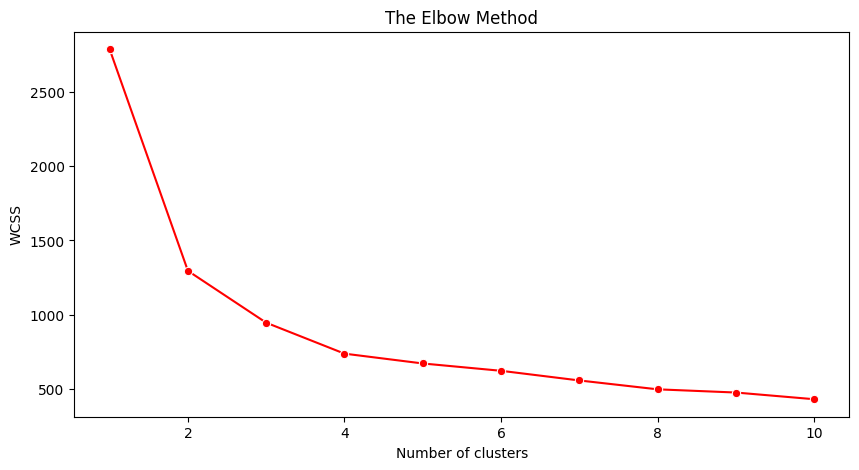

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Create a DataFrame for seaborn
elbow_data = pd.DataFrame({'Number of Clusters': range(1, 11), 'WCSS': wcss})

plt.figure(figsize=(10, 5))
# Use the 'data' argument to pass the DataFrame
sns.lineplot(x='Number of Clusters', y='WCSS', data=elbow_data, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### We can see that the there is a bend at 2 and a slight bend at 4, we can start with cluster 3 and proceed till 5

-----------------------------

### d. Regenerate the clusters using K value from the Elbow plot

              cyl        disp          hp           wt        acc         yr  \
Cluster                                                                        
0        6.153846  223.923080  102.449013  3242.439453  16.385714  76.032967   
1        8.000000  349.705261  162.105270  4154.526367  12.604211  73.526314   
2        3.969388  108.301018   82.695305  2326.153076  16.480612  73.663269   
3        4.052631  112.026314   75.701645  2320.385986  16.600878  80.078949   

               mpg  
Cluster             
0        19.667032  
1        14.469474  
2        25.138777  
3        32.727192  


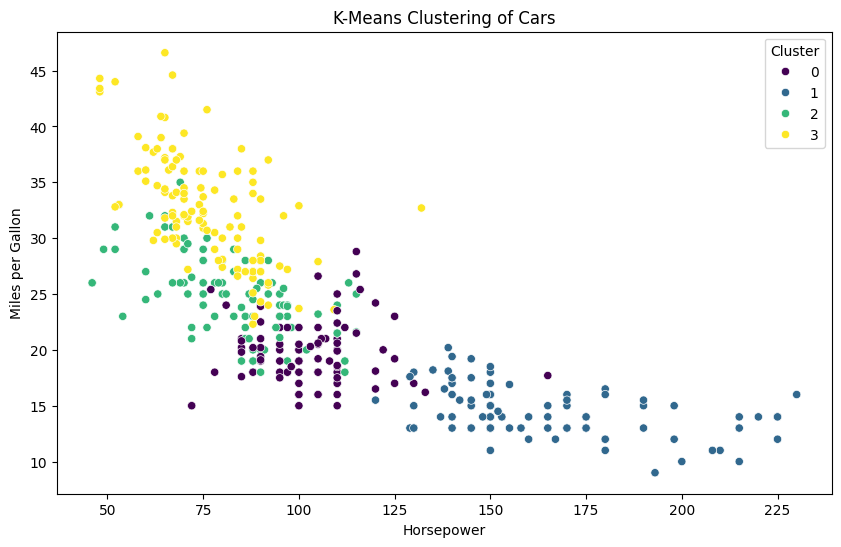

In [ ]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)  # Example with 3 clusters
kmeans.fit(scaled_df)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Analyze the clusters
# Select only numerical columns before calculating the mean
numerical_df = df.select_dtypes(include=np.number)
print(numerical_df.groupby('Cluster').mean()) # look at the means of the features for each cluster

# Visualize the clusters (example with two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Cars')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.show()

# You can visualize other feature combinations as well

# Further analysis: Explore the characteristics of each cluster.
# For example, you can examine the average values of other features for each cluster.

Cluster 0:
Primarily consists of vehicles with an average of about 4 cylinders, 110.4 displacement, and 83.2 horsepower.
They are relatively lightweight, with an average weight of 2335.8 lbs, and have moderate acceleration (16.45).
The vehicles in this cluster are mostly from model years around 1973 and have an average fuel efficiency of 25.1 mpg, suggesting a focus on fuel-efficient, lighter cars typical of the mid-70s.

Cluster 1:
Represents larger, more powerful vehicles with an average of 8 cylinders, 350 displacement, and 162.4 horsepower.
Heaviest among the clusters, with an average weight of 4157.9 lbs, and has a relatively lower acceleration (12.6), indicating these vehicles are likely designed for power rather than speed.
The vehicles are mostly from around 1973 and have the lowest fuel efficiency of 14.4 mpg, consistent with high-displacement, heavy cars that prioritise performance over fuel efficiency.

Cluster 2:
Features vehicles with an intermediate average of about 6 cylinders, 225.5 displacement, and 103.1 horsepower.
The average weight is around 3262.9 lbs, with similar acceleration to Cluster 0 (16.39).
Vehicles in this group are mostly from around 1976, and they have a fuel efficiency of 19.6 mpg, suggesting they balance power and fuel efficiency.

Cluster 3:
Consists of smaller, lightweight vehicles averaging around 4 cylinders, 111.8 displacement, and lower horsepower (76.3).
This cluster has the lightest vehicles on average (2316.8 lbs) and a high fuel efficiency of 32.8 mpg, which is the best among the clusters.
The average model year is closer to 1980, indicating that these are likely more modern, fuel-efficient compact cars typical of the early 80s fuel economy

------------------------------

### e. Store the cluster id of every instance back into the original dataframe

In [ ]:


# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

df.to_csv('KMeansExample0_Output.csv')

# ... (rest of your existing code)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car name  398 non-null    object 
 1   cyl       398 non-null    float32
 2   disp      398 non-null    float32
 3   hp        398 non-null    float32
 4   wt        398 non-null    float32
 5   acc       398 non-null    float32
 6   yr        398 non-null    float32
 7   mpg       398 non-null    float32
 8   Cluster   398 non-null    int32  
dtypes: float32(7), int32(1), object(1)
memory usage: 15.7+ KB


----------------------------

### f. Inspect the K clusters visually using boxplot and share your findings  

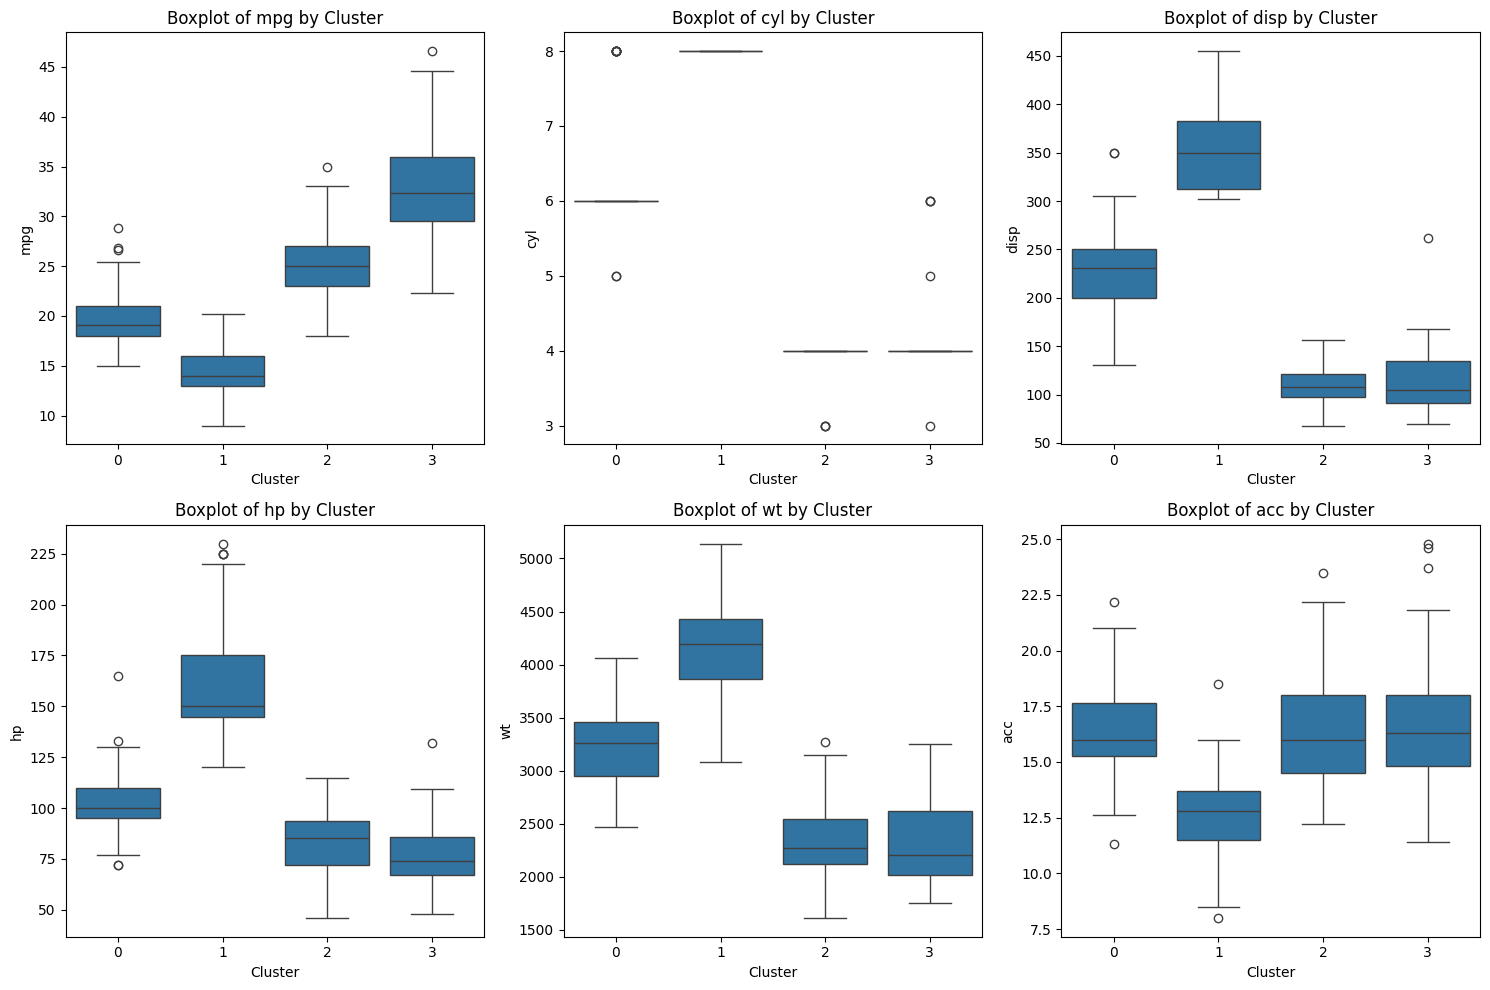

In [ ]:

numerical_features = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

From the Box Plot,  ***MPG plot against clusters***, we can see that the clustering has done quite a good job, there is very little overlap between the clusters.

***acc vs Clusters***, in this plot, we can see there are more overlap, indicating the clusters are not clearly distinguishable here.

In all the other clusters, we can see just 2 values getting overlapped, which is not too difficult to distinguish the clusters



### ***Boxplot of mpg by Cluster***:

Cluster 3 has the highest median mpg, indicating it represents the most fuel-efficient vehicles, with mpg values well above 30.

Cluster 1 has the lowest mpg values, around 10–20, indicating these vehicles are the least fuel-efficient.

Cluster 0 and Cluster 2 show moderate mpg values, with Cluster 0 slightly more fuel-efficient than Cluster 2.

### ***Boxplot of cylinder by Cluster:***

Cluster 1 is made up entirely of 8-cylinder vehicles, showing a higher power preference.
Cluster 2 contains mostly 6-cylinder vehicles, indicating a moderate power level.
Clusters 0 and 3 primarily have 4-cylinder vehicles, representing smaller, likely more fuel-efficient engines.

### ***Boxplot of displacement by Cluster:***

Cluster 1 has the highest displacement values, ranging from around 300 to 450, indicative of high-power engines.
Cluster 2 has moderate displacement values, typically between 150 and 300, aligning with 6-cylinder vehicles.
Clusters 0 and 3 have much lower displacement, under 150, which is expected for 4-cylinder engines.

### ***Boxplot of hp by Cluster:***

Cluster 1 has the highest horsepower, with values generally above 150, corresponding to high-performance, powerful vehicles.
Cluster 2 has moderate horsepower, between 75 and 125, aligning with mid-range performance.
Clusters 0 and 3 have lower horsepower, typically under 100, suggesting they prioritize fuel efficiency over power.

### ***Boxplot of weight by Cluster:***

Cluster 1 shows the heaviest vehicles, with weights around 3500–4500 lbs, indicating robust, high-performance builds.
Cluster 2 has moderately heavy vehicles, around 2500–3500 lbs.
Clusters 0 and 3 have lighter vehicles, especially Cluster 3, where weights are consistently low, reflecting a focus on compact and lightweight design.

### ***Boxplot of acceleration by Cluster:***

All clusters have a similar range of acceleration values, between 12 and 20, with slight variations.
Cluster 1 has a slightly lower median acceleration, suggesting these heavy vehicles may prioritize power over acceleration.
Clusters 0, 2, and 3 have higher median acceleration values, indicating moderate to high acceleration abilities for these lighter vehicles.

--------------------

# 2. Feature Selection Feature Engineering

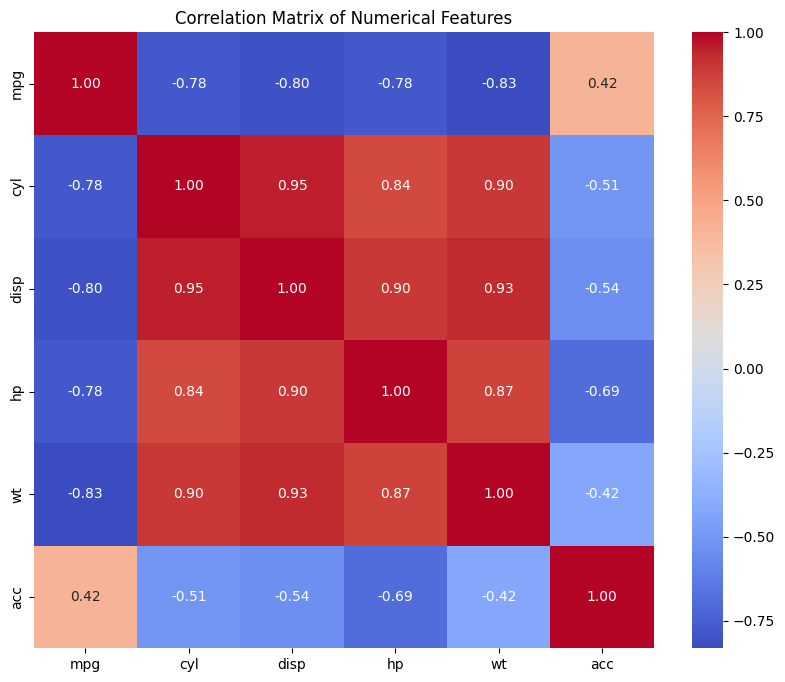

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

***Weight (wt):*** Strong negative correlation of -0.83 with mpg. This indicates that as vehicle weight increases, fuel efficiency decreases, making weight a significant factor for predicting mpg.

***Displacement (disp):*** Strong negative correlation of -0.80 with mpg, suggesting that larger engine displacement is associated with lower fuel efficiency.

***Cylinders (cyl):*** Negative correlation of -0.78 with mpg, implying that vehicles with more cylinders tend to have lower mpg.

***Horsepower (hp):*** Negative correlation of -0.77 with mpg, indicating that higher horsepower vehicles are generally less fuel-efficient.

***Acceleration (acc)*** Positive correlation of 0.42 with mpg, suggesting that cars with better acceleration tend to have slightly higher mpg, though the relationship is weaker compared to the other variables

## **Relationships Among Independent Variables:**

There are very high positive correlations among cyl, disp, hp, and wt, meaning that these variables are closely related and could lead to multicollinearity issues in a predictive model. For example, cyl and disp have a correlation of 0.95, and disp and wt have a correlation of 0.93. Using all of these variables together might not add much new information and could complicate the model.

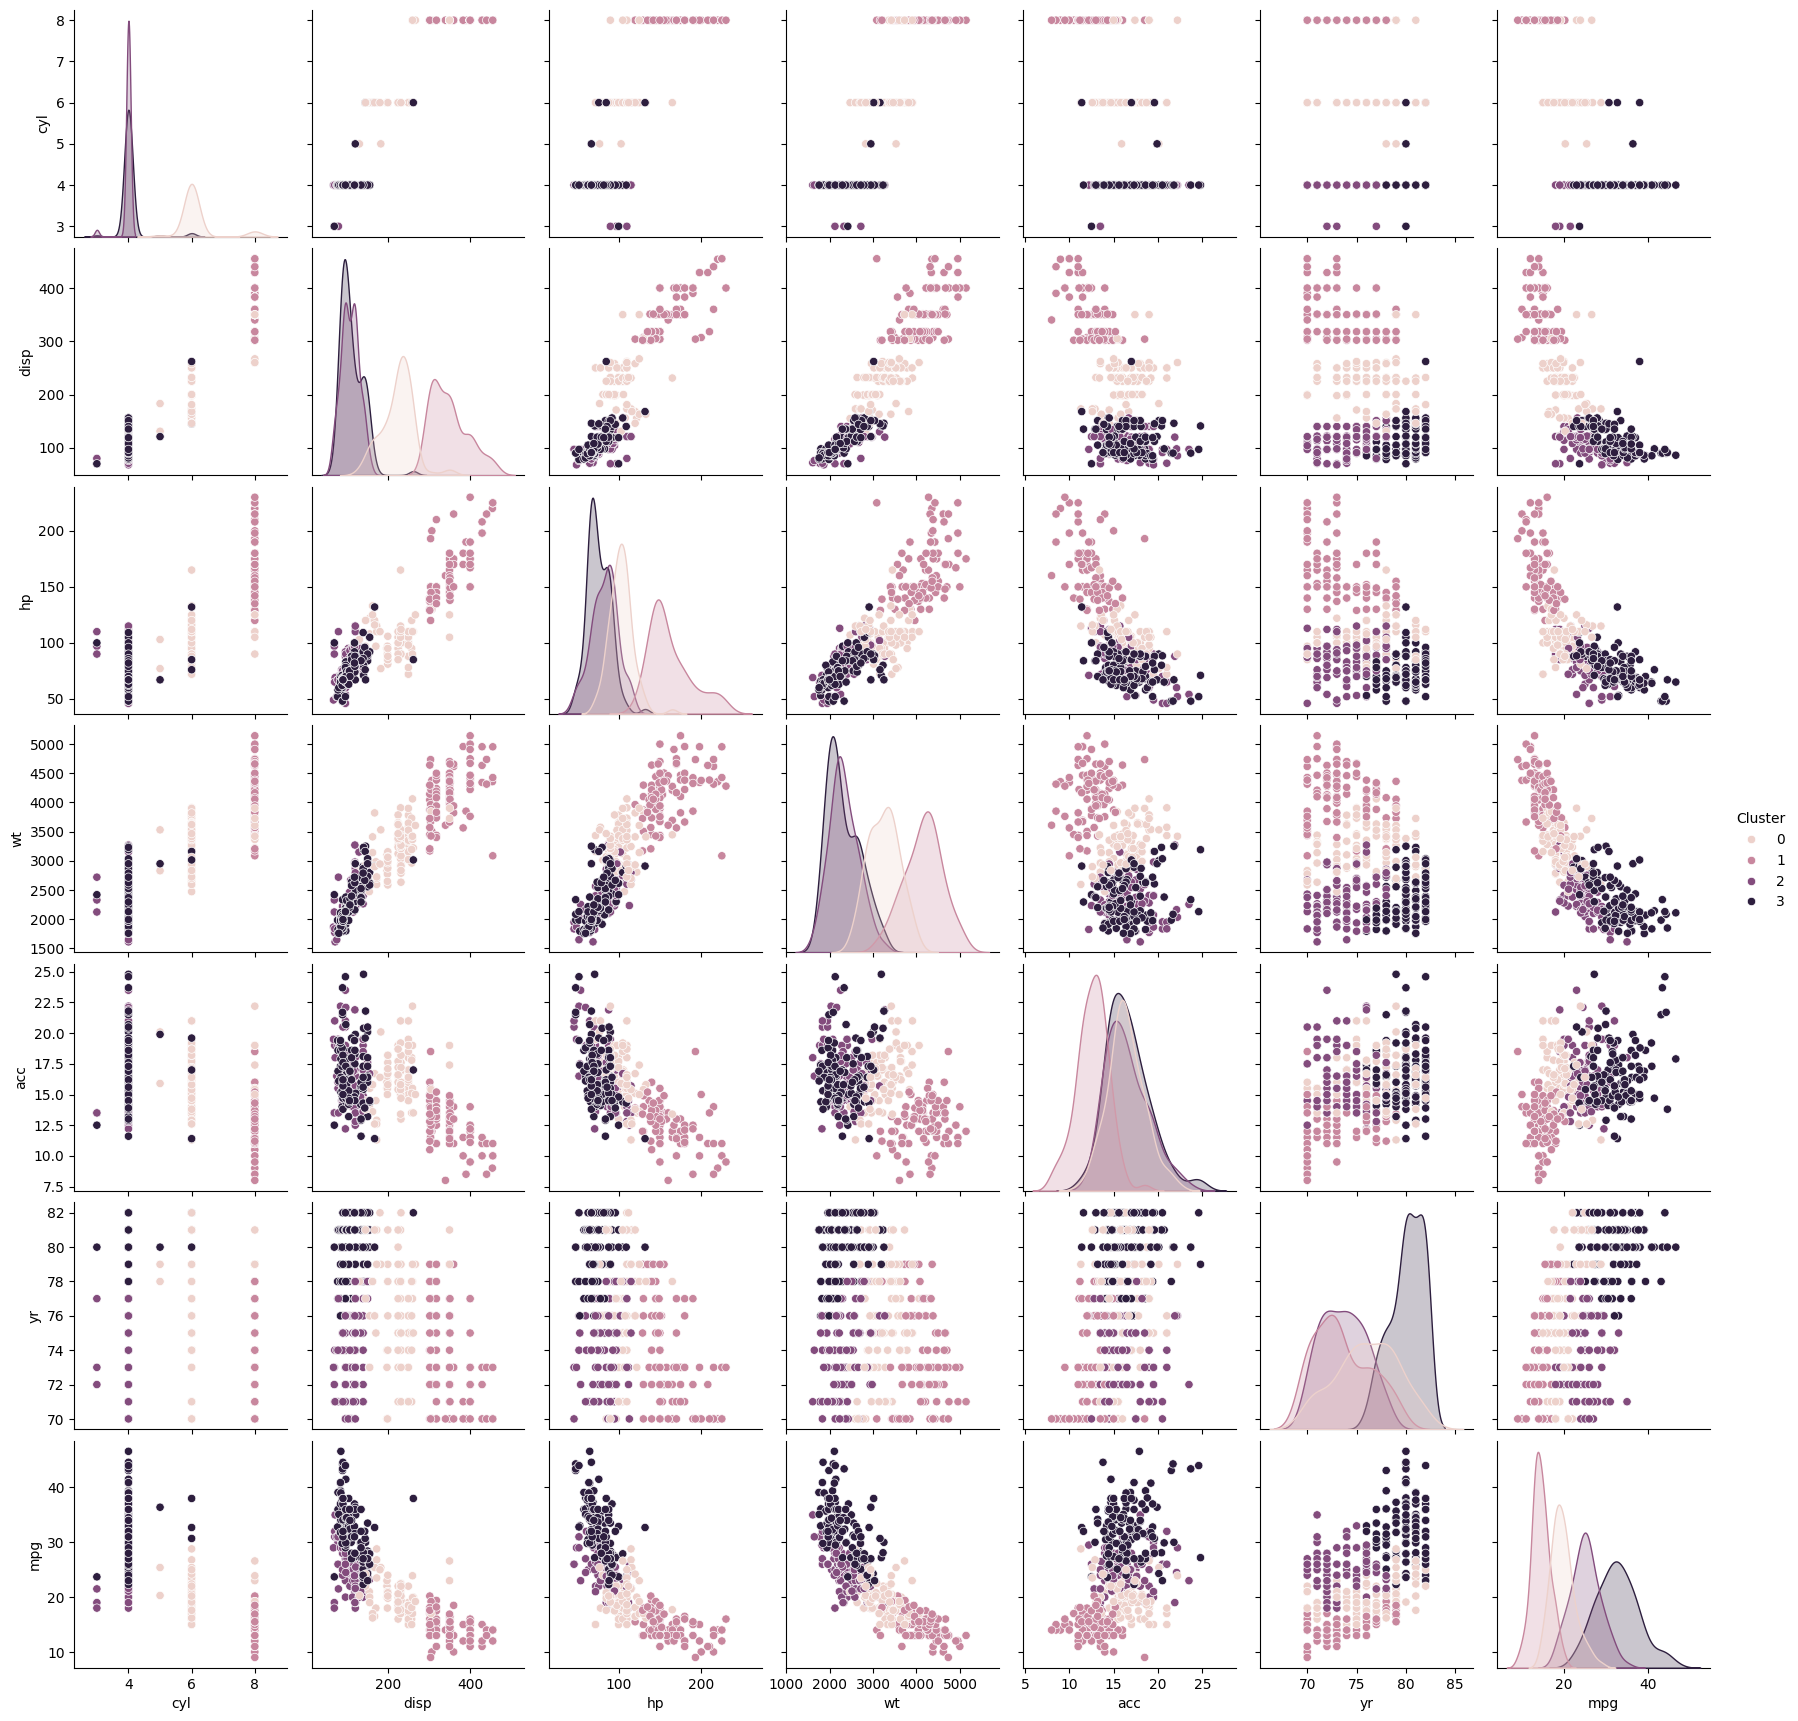

In [ ]:

sns.pairplot(df, hue='Cluster')
plt.show()

***Primary Features:*** mpg, cyl, disp, hp, and wt due to their strong relationships and ability to differentiate clusters.

***Secondary Feature:*** acc could be included for further analysis, though it has a weaker relationship with mpg and the clusters.



In summary, the best features are mpg, cyl, disp, hp, and wt, as these provide the most significant information for distinguishing between clusters and predicting fuel efficiency and vehicle performance.

--------------------

### *** b. Comment on multicollinearity amongst the predictor attributes (if any) and your approach to deal with it if you did. Give reasons for your decision (whether you do something about multicollinearity or not) ***

## **High Correlations:**

cyl (Cylinders) is highly correlated with disp (Displacement) and hp (Horsepower).

disp (Displacement) is also highly correlated with hp (Horsepower) and wt (Weight).

hp (Horsepower) and wt (Weight) have a strong correlation as well.

### ***Approach to Address Multicollinearity***

***Principal Component Analysis (PCA):*** PCA could be applied to create uncorrelated components that capture most of the variance in the data.

When there are variables that are correlated with each other, we might have to remove one to build our model, but if PCA is used, then it captures the best features by combining both the features under contention to build models.

-----------------------

### ***C. Are there any features which are not good features but together they become strong? ***

we can find this after we perfrom PCA on the dataset, but on conjecture we can see that the primary reason these features are strong in combination is due to their shared relationships with each other and with mpg. Each feature represents different aspects of the vehicle's power, engine size, and weight:

Cylinders, Displacement, Horsepower, and Weight collectively describe a vehicle's engine size and power output characteristics, which directly impact fuel consumption.
Acceleration, while less correlated individually, reflects how these attributes affect vehicle performance, adding an extra dimension when paired with the other features.

-----------------------

### ***d. Construct a baseline model using the entire feature set. Generate its performance report on training and testing. Is the model generalizing?***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np



## df_raw = df_raw.drop(columns=['car name'])
df_base_model = df.drop(columns=['car name'])

# Discretize the 'mpg' variable into 3 categories: Low, Medium, High
# You can change the bins and labels based on your analysis requirements
df_base_model['mpg_category'] = pd.qcut(df_base_model['mpg'], q=3, labels=['Low', 'Medium', 'High'])

# Separate features and the new categorical target variable
X = df_base_model.drop(columns=['mpg', 'mpg_category'])
y = df_base_model['mpg_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for classification model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construct and fit a baseline classification model using Logistic Regression
classifier = LogisticRegression(random_state=42, max_iter=1000)
classifier.fit(X_train, y_train)

# Generate predictions for both training and testing sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Generate Confusion Matrix and Classification Report for Training Data
print("Training Data Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# Generate Confusion Matrix and Classification Report for Test Data
print("\nTest Data Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Data Evaluation:
Confusion Matrix:
 [[ 98   0  12]
 [  0 101  14]
 [ 15  13  65]]

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.89      0.88       110
         Low       0.89      0.88      0.88       115
      Medium       0.71      0.70      0.71        93

    accuracy                           0.83       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.83      0.83      0.83       318


Test Data Evaluation:
Confusion Matrix:
 [[20  0  3]
 [ 0 26  2]
 [ 3  5 21]]

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.87      0.87        23
         Low       0.84      0.93      0.88        28
      Medium       0.81      0.72      0.76        29

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



### ***we can see the Accuracy is 83% wrt to the train data and 84% with respect to the test data, this looks like a very good model***


### ***The precesion and recall values are also really impressive and better for the test data set***

-------------------------

### ***E. Create model_1 on selected features and compare its performance with baseline model and report your findings ***

In [ ]:

df_model_1 = df.copy()
# Discretize 'mpg' into categories
df_model_1['mpg_category'] = pd.qcut(df_model_1['mpg'], q=3, labels=['Low', 'Medium', 'High'])

# Separate features and target variable
X = df_model_1.drop(columns=['car name','mpg','mpg_category'])
y = df_model_1['mpg_category']

# Split and standardize data for baseline model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline model with all features
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Selected features based on analysis: 'wt', 'disp', 'cyl'
X_selected = df_model_1[['wt', 'disp', 'cyl']]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)
scaler_selected = StandardScaler()
X_train_selected = scaler_selected.fit_transform(X_train_selected)
X_test_selected = scaler_selected.transform(X_test_selected)

# Model_1 with selected features
model_1 = LogisticRegression(random_state=42, max_iter=1000)
model_1.fit(X_train_selected, y_train_selected)
y_train_pred_selected = model_1.predict(X_train_selected)
y_test_pred_selected = model_1.predict(X_test_selected)

# Performance Reports
print("Baseline Model (All Features) - Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nBaseline Model (All Features) - Test Classification Report:\n", classification_report(y_test, y_test_pred))

print("\nModel_1 (Selected Features) - Training Classification Report:\n", classification_report(y_train_selected, y_train_pred_selected))
print("\nModel_1 (Selected Features) - Test Classification Report:\n", classification_report(y_test_selected, y_test_pred_selected))

Baseline Model (All Features) - Training Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.89      0.88       110
         Low       0.89      0.88      0.88       115
      Medium       0.71      0.70      0.71        93

    accuracy                           0.83       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.83      0.83      0.83       318


Baseline Model (All Features) - Test Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.87      0.87        23
         Low       0.84      0.93      0.88        28
      Medium       0.81      0.72      0.76        29

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80


Model_1 (Selected Features) - Training Classification Report:
               precision    recall  f1-score   s

***Accuracy Comparison***
***Baseline Model:*** With more features, the baseline model might achieve higher accuracy, as it has access to all predictive information, albeit with possible multicollinearity.

***Model_1:*** Accuracy might be slightly lower, as it uses fewer features, but ideally, it would be similar to the baseline. If the accuracy is close, it suggests that the selected features capture most of the predictive power without needing the full feature set.

***2. Precision, Recall, and F1-Score for Each Category (Low, Medium, High Precision:***
Higher precision in a category (e.g., Low mpg) indicates that when the model predicts a car as Low mpg, it’s likely to be correct.
Compare precision for each category across both models. If Model_1’s precision is close to or matches that of the baseline model, the selected features are adequately distinguishing categories without the extra features.

-----------------------

# ***3. Principle Component Analysis     ***

### ***a. Will PCA be effective on the original standardized dataset? (Do you notice strong collinearity among most variables?  ***

Yes, PCA is likely to be effective on the original standardized dataset because there is strong collinearity among several variables. PCA can help by reducing the dimensionality of the dataset and transforming it into a set of uncorrelated components, capturing the maximum variance in fewer principal components

---------------------

### ***b.Perform PCA on the standardized dataset and generate eigen vector eigen value and cumulative eigen value chart ***

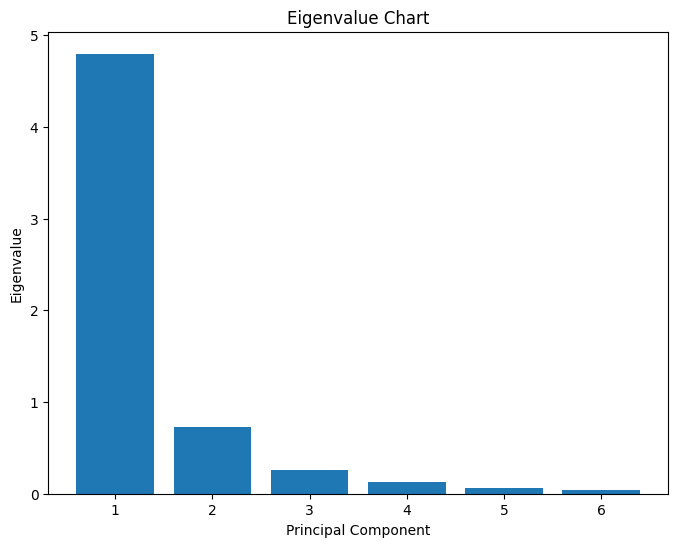

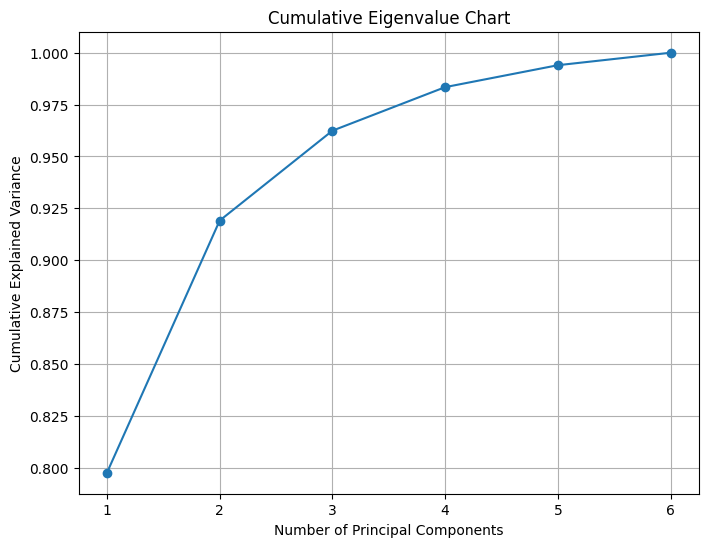

In [ ]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting only numerical features for PCA
numerical_features = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc']
df_numerical = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Create the eigenvalue chart
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Chart')
plt.show()

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Create the cumulative eigenvalue chart
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Eigenvalue Chart')
plt.grid(True)
plt.show()

## **INSIGHTS FROM THE EIGEN PLOT**

### ***The first three factors, i.e mpg, cyl and wt has higher influence on the variance in the data. These variables may exhibit stronger correlations and account for significant patterns in the dataset.***

### ***variables like 'acc' or 'hp' might have less unique variance to add once the main factors have been accounted for.***

### ***Selecting three or four components would likely be sufficient for retaining the most critical information, as these capture the relationships among variables***

----------------

### ***c. Reduce number of dimensions (drop eigen vectors) and recreate the model as model_2. Share the model performance metrics and compare with the baseline model and model_1 performance ***

In [ ]:
# Number of components to keep (e.g., keeping 3 components)
n_components = 3

# Perform PCA with the specified number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a new logistic regression model (model_2) using the PCA-transformed data
model_2 = LogisticRegression(random_state=42, max_iter=1000)
model_2.fit(X_train_pca, y_train)

# Make predictions using model_2
y_train_pred_pca = model_2.predict(X_train_pca)
y_test_pred_pca = model_2.predict(X_test_pca)

# Evaluate model_2
print("\nModel_2 (PCA) - Training Classification Report:\n", classification_report(y_train, y_train_pred_pca))
print("\nModel_2 (PCA) - Test Classification Report:\n", classification_report(y_test, y_test_pred_pca))


print("\nModel Performance Comparison:")
print("Baseline Model Accuracy (Test):", classification_report(y_test,y_test_pred).split('\n')[2].split()[1])
print("Model_1 Accuracy (Test):", classification_report(y_test_selected,y_test_pred_selected).split('\n')[2].split()[1])
print("Model_2 (PCA) Accuracy (Test):", classification_report(y_test, y_test_pred_pca).split('\n')[2].split()[1])



Model_2 (PCA) - Training Classification Report:
               precision    recall  f1-score   support

        High       0.82      0.90      0.86       110
         Low       0.89      0.91      0.90       115
      Medium       0.75      0.65      0.69        93

    accuracy                           0.83       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.83      0.83      0.83       318


Model_2 (PCA) - Test Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.83      0.84        23
         Low       0.81      0.89      0.85        28
      Medium       0.74      0.69      0.71        29

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80


Model Performance Comparison:
Baseline Model Accuracy (Test): 0.83
Model_1 Accuracy (Test): 0.65
Model_2 (PCA) Accuracy (Test): 0.86


***The model 2 performance has increased tremendously, which is a good sign of the PCA being used***

------------------

# ***d. List the benefits of and drawbacks of PCA   ***

### **Benefits of PCA**
***Dimensionality Reduction:*** Simplifies models by reducing features.

***Mitigates Multicollinearity:*** Converts correlated features into uncorrelated components.

***Improves Model Performance:*** Reduces noise, enhancing accuracy and stability.

***Reveals Patterns:*** Highlights underlying structure in data.

***Enables Visualisation:*** Allows high-dimensional data to be visualised in 2D or 3D.

### **Drawbacks of PCA**

***Loss of Interpretability:*** Components lack clear, direct meanings.

***Information Loss:*** Discards lower-variance components, which may have relevant details.

***Scaling Sensitivity:*** Requires standardization to avoid bias.

***Linear Assumption:*** Misses non-linear relationships.

***Computational Cost:*** Resource-intensive for very large datasets.